In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:

df = df.iloc[:,1:]

In [7]:
import matplotlib.pyplot as plt

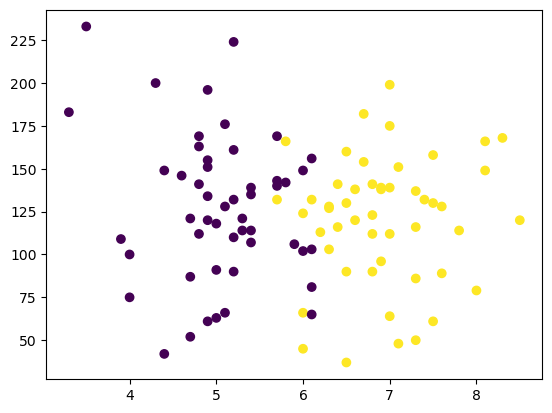

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
     

In [9]:

X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y.shape

(100,)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [13]:
X_train

,cgpa,iq
92,5.2,110.0
11,6.9,138.0
90,7.3,86.0
55,7.8,114.0
2,5.3,121.0
...,...,...
5,7.1,48.0
77,7.3,50.0
8,6.1,156.0
20,6.6,120.0


In [14]:

y_train

92    0
11    1
90    1
55    1
2     0
     ..
5     1
77    1
8     0
20    1
19    0
Name: placement, Length: 90, dtype: int64

In [15]:
X_test

,cgpa,iq
26,7.0,199.0
17,3.3,183.0
57,6.5,130.0
91,7.5,158.0
10,6.0,45.0
75,4.8,169.0
43,6.8,141.0
56,6.1,65.0
73,4.9,61.0
81,5.4,107.0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_train

array([[-0.71548266, -0.34902366],
       [ 0.78821029,  0.38392603],
       [ 1.1420204 , -0.97726626],
       [ 1.58428303, -0.24431656],
       [-0.62703013, -0.06107914],
       [-0.62703013, -0.24431656],
       [-0.98084024, -0.08725592],
       [ 1.84964061,  0.67187055],
       [ 0.43440018,  0.95981507],
       [-2.2191756 ,  2.87071963],
       [ 0.34594766,  0.46245635],
       [-0.80393518,  0.12215828],
       [ 1.31892545,  0.17451183],
       [-0.71548266,  0.98599185],
       [-0.1847675 ,  1.11687572],
       [-0.5385776 ,  0.30539571],
       [ 0.08059008, -0.53226109],
       [-0.89238771, -0.13960947],
       [ 0.52285271,  0.38392603],
       [ 0.87666282, -1.5531553 ],
       [-0.1847675 ,  0.48863313],
       [-0.00786245, -1.50080175],
       [ 0.69975776, -0.29667011],
       [ 2.02654566,  1.16922927],
       [ 0.87666282,  0.4101028 ],
       [-0.27322003,  0.43627958],
       [ 0.87666282,  1.35246669],
       [-1.15774529, -1.8672766 ],
       [-1.24619782,

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0.87666282,  1.98070929],
       [-2.39608066,  1.56188089],
       [ 0.43440018,  0.17451183],
       [ 1.31892545,  0.90746152],
       [-0.00786245, -2.05051402],
       [-1.06929276,  1.19540605],
       [ 0.69975776,  0.46245635],
       [ 0.08059008, -1.52697853],
       [-0.98084024, -1.63168562],
       [-0.5385776 , -0.42755399]])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()

In [24]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred = clf.predict(X_test)

In [26]:
y_test

26    1
17    0
57    1
91    1
10    1
75    0
43    1
56    0
73    0
81    0
Name: placement, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

0.9

In [29]:

from mlxtend.plotting import plot_decision_regions
     

<AxesSubplot: >

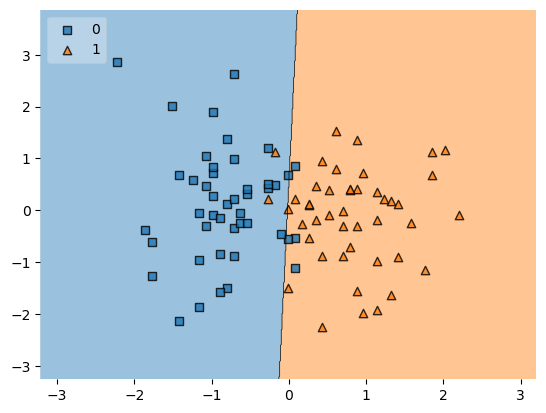

In [30]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)